Questions: 
- over/undersampling before or after finding best k?
- How much should i write about K-nearest neighbour, or the sklearn implementation of it (its parameters?)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('train_dataset.csv')


##### Helper functions (courtesy of Gabriel Atkin) #####

In [3]:
# Use inverse_transform() before evaluating your model's performance (?)
def split_and_scale(df):
    df = df.copy()

    # Split the data into X and y
    y = df[' Forest Cover Type Classes'].copy()
    X = df.drop(' Forest Cover Type Classes', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

    # Scale the data, gives each column in X a mean of 0 and a variance of 1
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_test, y_test):
    acc = model.score(X_test, y_test)
    print(f'Model accuracy: {acc:.2f}')

    predictions = model.predict(X_test)

    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)

    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("classification report: \n", report)

#### TODO: Testing different k values (gridsearch) ####

In [ ]:
K = [1, 3, 5, 7, 9, 11, 13, 15, 17]
acc = []

X_train, X_test, y_train, y_test = split_and_scale(df)
for k in K:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    score = model.score(X_test, y_test)
    acc.append(score)

    match = np.sum(predictions == y_test)
    #...



#### evaluate model ####

*Imbalanced data*
Model accuracy: 0.97


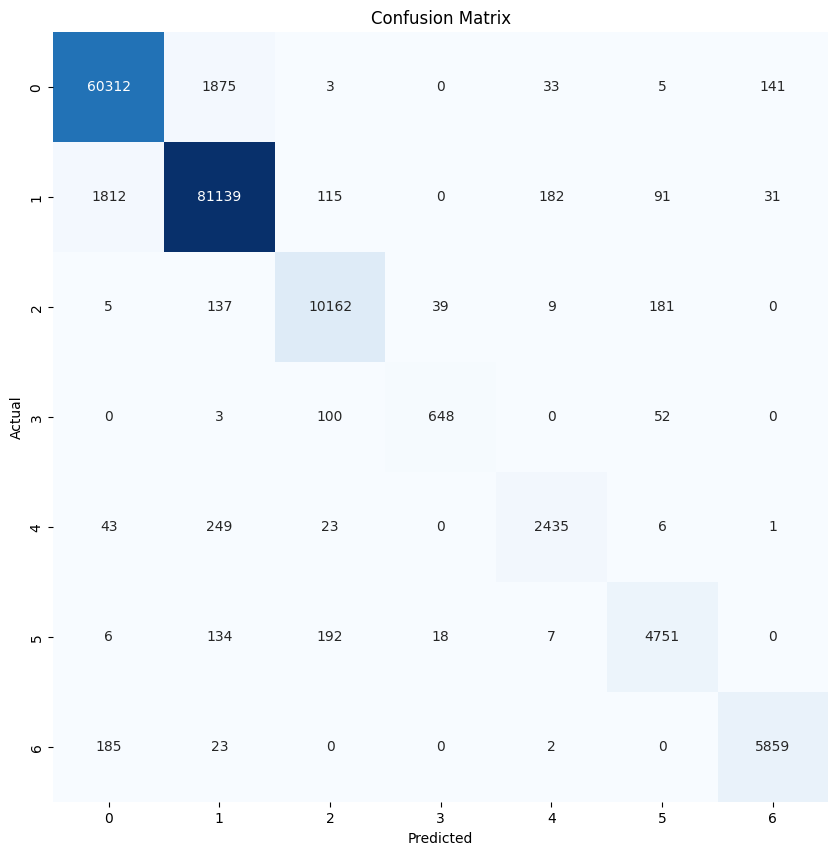

classification report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97     62369
           2       0.97      0.97      0.97     83370
           3       0.96      0.96      0.96     10533
           4       0.92      0.81      0.86       803
           5       0.91      0.88      0.90      2757
           6       0.93      0.93      0.93      5108
           7       0.97      0.97      0.97      6069

    accuracy                           0.97    171009
   macro avg       0.95      0.93      0.94    171009
weighted avg       0.97      0.97      0.97    171009



In [11]:
df = df.copy()

# Split the data into X and y
y = df[' Forest Cover Type Classes'].copy()
X = df.drop(' Forest Cover Type Classes', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(X_train, y_train)
print("*Imbalanced data*")
evaluate_model(model, X_test, y_test)

#### Undersampling vs Oversampling ####

Class distribution: 
  Forest Cover Type Classes
2    278006
1    207785
3     35067
7     20132
6     17036
5      9308
4      2696
Name: count, dtype: int64


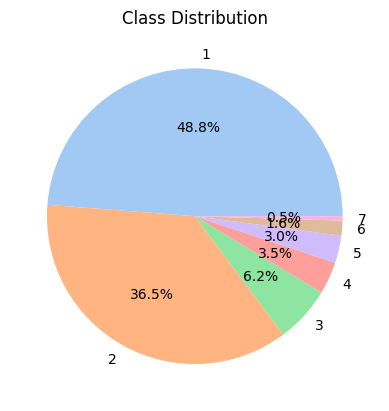

In [7]:
#Class distribution
print("Class distribution: \n", df[' Forest Cover Type Classes'].value_counts())
plt.pie(
    df[' Forest Cover Type Classes'].value_counts(),
    labels=[1,2,3,4,5,6,7],
    colors=sns.color_palette('pastel'),
    autopct='%.1f%%'
)
plt.title('Class Distribution')
plt.show()